<a href="https://colab.research.google.com/github/choi-yh/BOJ/blob/master/%EA%B7%B8%EB%9E%98%ED%94%84/7576_%ED%86%A0%EB%A7%88%ED%86%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 10.07
https://www.acmicpc.net/problem/7576

문제
---
철수의 토마토 농장에서는 토마토를 보관하는 큰 창고를 가지고 있다. 토마토는 아래의 그림과 같이 격자 모양 상자의 칸에 하나씩 넣어서 창고에 보관한다. 

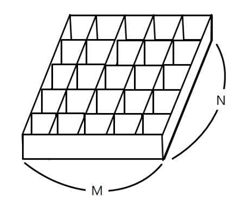

창고에 보관되는 토마토들 중에는 잘 익은 것도 있지만, 아직 익지 않은 토마토들도 있을 수 있다. 보관 후 하루가 지나면, 익은 토마토들의 인접한 곳에 있는 익지 않은 토마토들은 익은 토마토의 영향을 받아 익게 된다. 하나의 토마토의 인접한 곳은 왼쪽, 오른쪽, 앞, 뒤 네 방향에 있는 토마토를 의미한다. 대각선 방향에 있는 토마토들에게는 영향을 주지 못하며, 토마토가 혼자 저절로 익는 경우는 없다고 가정한다. 철수는 창고에 보관된 토마토들이 며칠이 지나면 다 익게 되는지, 그 최소 일수를 알고 싶어 한다.

토마토를 창고에 보관하는 격자모양의 상자들의 크기와 익은 토마토들과 익지 않은 토마토들의 정보가 주어졌을 때, 며칠이 지나면 토마토들이 모두 익는지, 그 최소 일수를 구하는 프로그램을 작성하라. 단, 상자의 일부 칸에는 토마토가 들어있지 않을 수도 있다.

입력
---
첫 줄에는 상자의 크기를 나타내는 두 정수 M,N이 주어진다. M은 상자의 가로 칸의 수, N은 상자의 세로 칸의 수를 나타낸다. 단, 2 ≤ M,N ≤ 1,000 이다. 둘째 줄부터는 하나의 상자에 저장된 토마토들의 정보가 주어진다. 즉, 둘째 줄부터 N개의 줄에는 상자에 담긴 토마토의 정보가 주어진다. 하나의 줄에는 상자 가로줄에 들어있는 토마토의 상태가 M개의 정수로 주어진다. 정수 1은 익은 토마토, 정수 0은 익지 않은 토마토, 정수 -1은 토마토가 들어있지 않은 칸을 나타낸다. 

출력
---
여러분은 토마토가 모두 익을 때까지의 최소 날짜를 출력해야 한다. 만약, 저장될 때부터 모든 토마토가 익어있는 상태이면 0을 출력해야 하고, 토마토가 모두 익지는 못하는 상황이면 -1을 출력해야 한다.



In [52]:
"""
BFS 문제
1인 부분에서 bfs를 수행해서 익은 날짜로 바꿔주면 된다.
문제는 1이 여러 군데 있을 때, 중복되는 부분을 어떻게 처리할 것인가
시간 초과 발생 & -1이 나오는 경우 고려안했음
---
익은 토마토가 있는 부분(1)을 한번에 큐에 넣고 bfs 수행
"""
from collections import deque

def bfs(x, y):
    day = 1

    dx = [-1, 1, 0, 0]
    dy = [0, 0, -1, 1]

    queue = deque()
    queue.append((x, y))

    day_queue = deque()
    day_queue.append(day)
    
    while queue:
        x, y = queue.popleft()
        day = day_queue.popleft()
        data[x][y] = day # 익은 날짜 저장 (후에 -1)

        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]

            if nx < 0 or ny < 0 or nx >= n or ny >= m:
                continue

            if (data[nx][ny] == 1) or (data[nx][ny] == -1):
                continue

            if ((data[nx][ny] == 0) or (data[nx][ny] > day)) and ((nx, ny) not in queue):
                queue.append((nx, ny))
                day_queue.append(day + 1)
    return day

m, n = map(int, input().split())
data = []
tomato = [] # 토마토 위치 저장할 인덱스
for i in range(n):
    tmp = list(map(int, input().split()))
    data.append(tmp)
    try:
        idx = tmp.index(1)
        tomato.append([i, idx])
    except ValueError:
        pass

for item in tomato:
    if data[item[0]][item[1]] == 1:
        day = bfs(item[0], item[1]) - 1

print(day)

6 5
0 0 1 0 0 0
0 0 0 0 0 0
1 0 0 0 0 0
0 0 0 0 0 0
0 0 1 0 0 0 
5


In [79]:
"""
익은 토미토의 위치를 한번에 큐에 저장하고 
해당 위치부터 bfs를 통해 익은 것을 확인하면 된다.
"""

from collections import deque

m, n = map(int, input().split())
data = []
queue = deque()
for i in range(n):
    data.append(list(map(int, input().split()))) # 행 별로 입력받기

for i in range(n):
    for j in range(m):
        if data[i][j] == 1:
            queue.append((i, j))

result = 0

# 이동할 방향
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

# BFS를 통해 주변에 익지 않은 토마토를 익히기
while queue:
    x, y = queue.popleft()

    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]

        if (0 <= nx < n) and (0 <= ny < m) and (data[nx][ny] == 0):
            data[nx][ny] = data[x][y] + 1
            queue.append((nx, ny))

# 전체를 다시 확인 하면서 0이 존재하면 익지 않은 토마토가 존재
check = False
result = -2
for row in data:
    for col in row:
        if col == 0:
            check = True
        result = max(result, col)

if check:
    print(-1)
elif result == -1:
    print(0)
else:
    print(result - 1)

6 4
0 0 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 1
8
